In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import sys
# google drive path to .py
sys.path.append('/content/drive/My Drive/ECSE551/mini_1')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from training_model.discriminative_learning import Discriminative_Learning
from training_model.lda_learning import LDA_Learning
from kfold_cross_validation.kfold_cross_validation import kfold_cross_validation
from advance_model.Discriminative_Learning_advance import DL_advance
from statistical_analysis.statistical_analysis import Statistical_Analysis

dataset_path = '/content/drive/My Drive/ECSE551/mini_1/database'

# All below cells are independent, run each cell for corresponding task

Histogram plots


Histogram of database: red_wine.csv


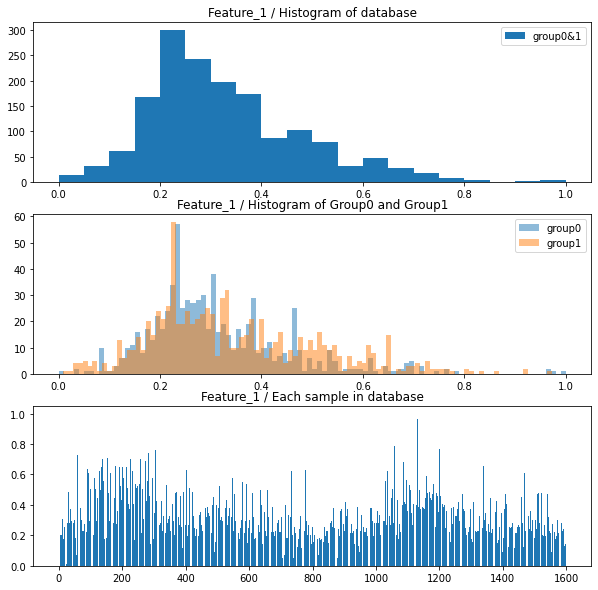

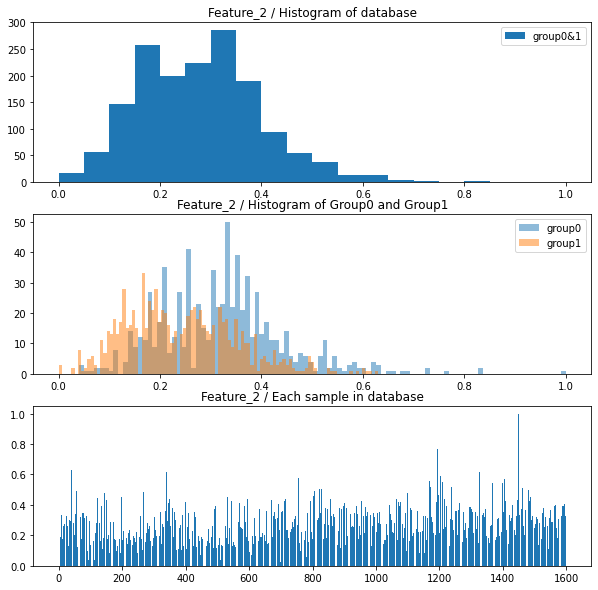

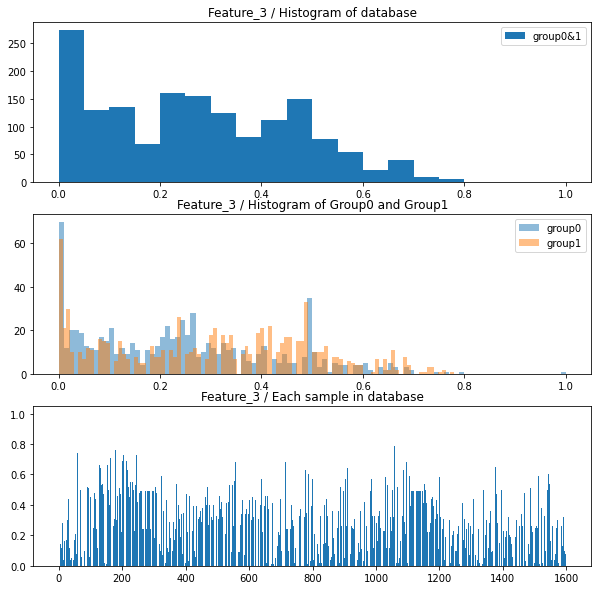

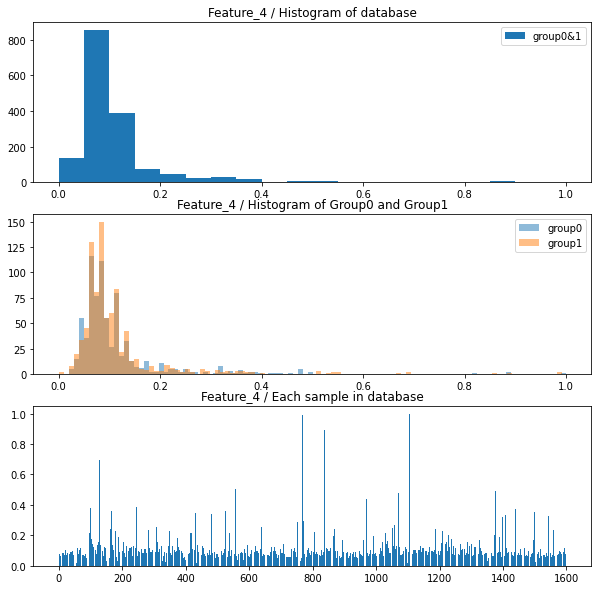

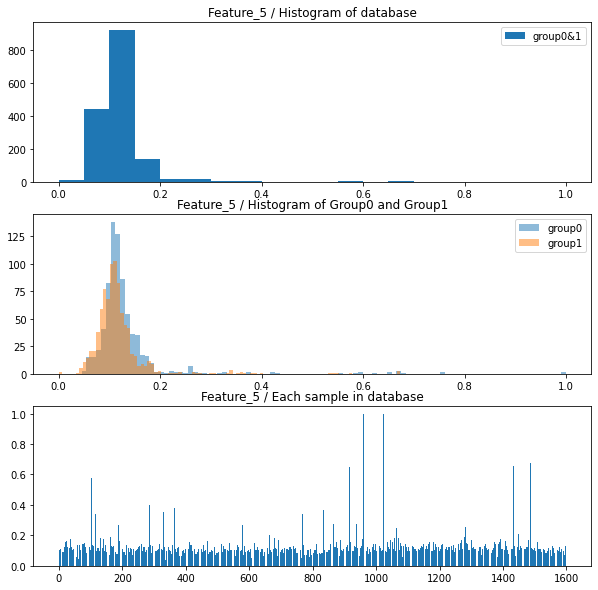

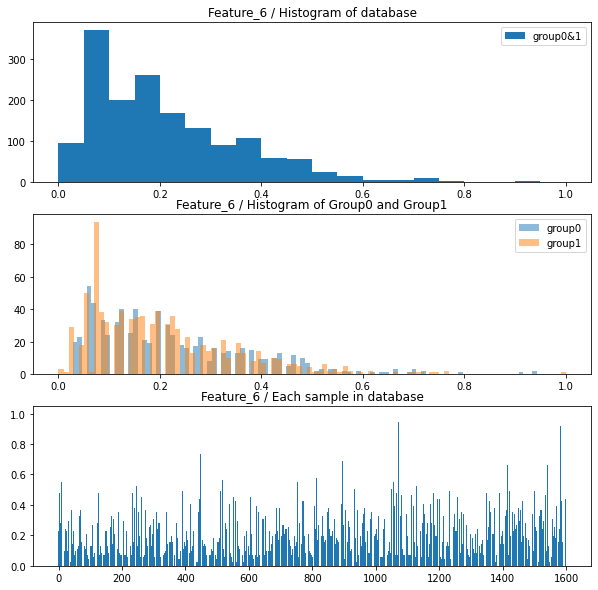

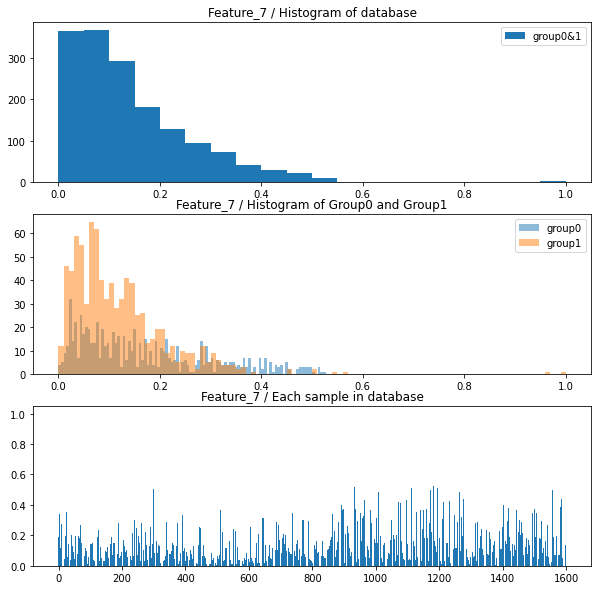

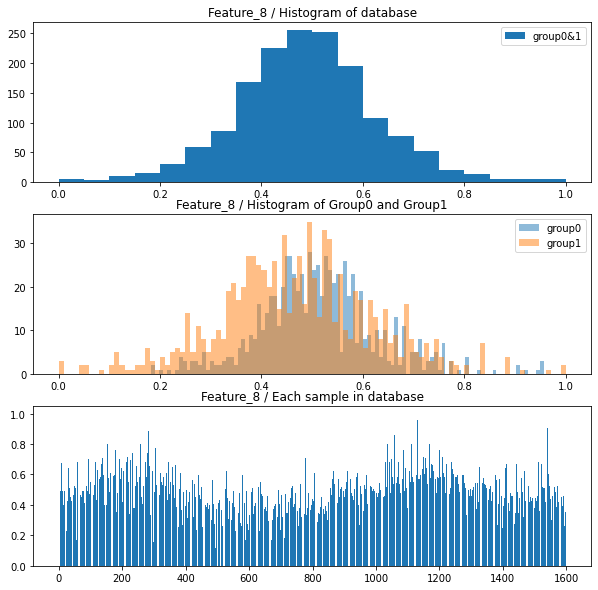

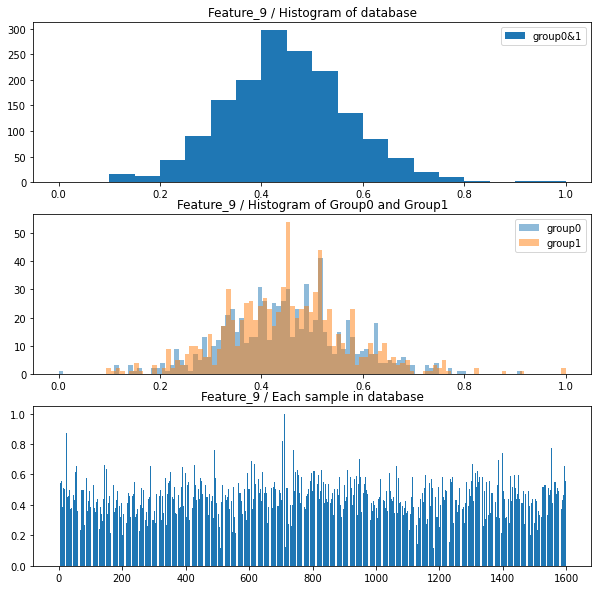

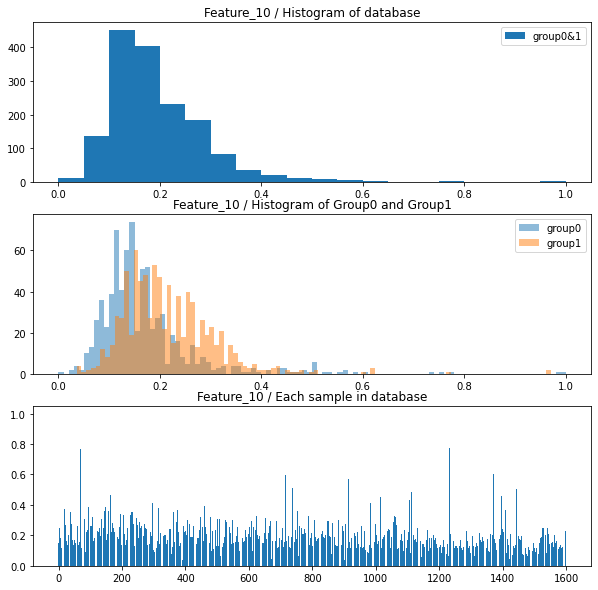

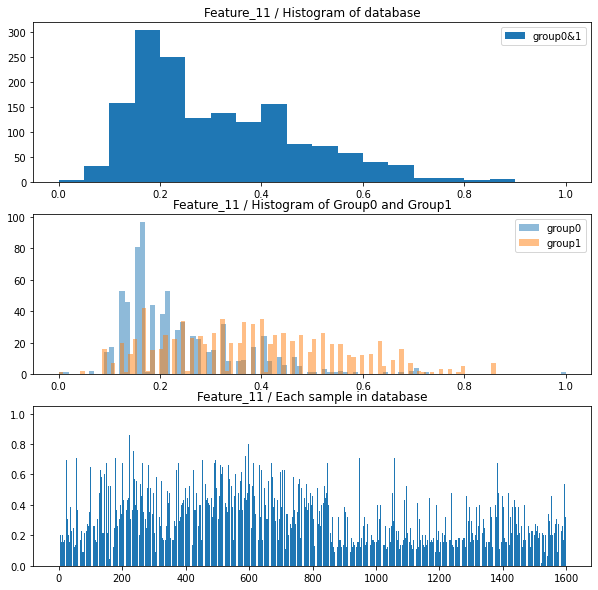

Histogram of database: diabetes.csv


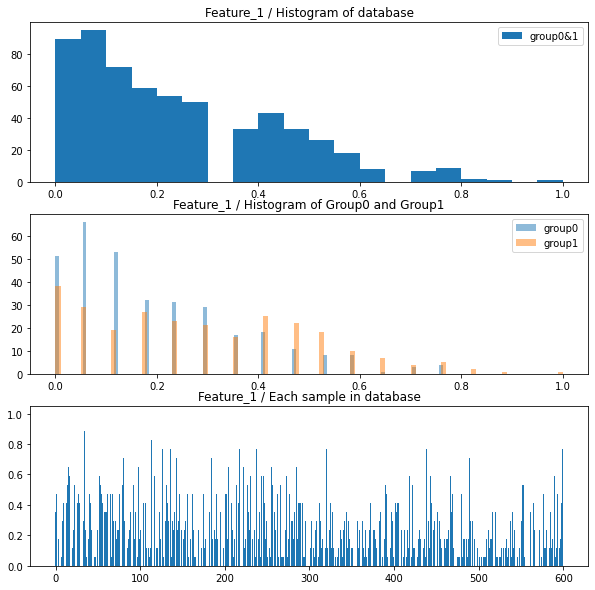

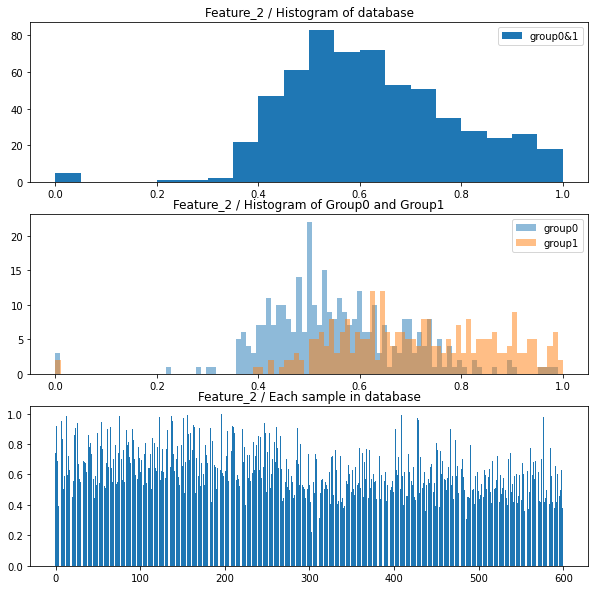

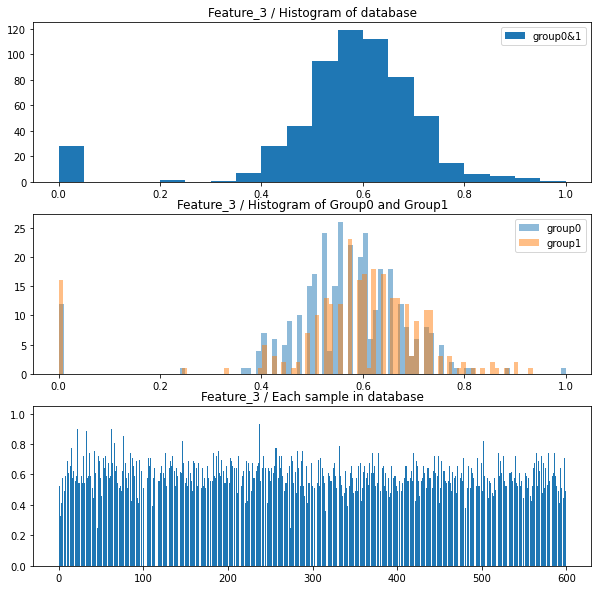

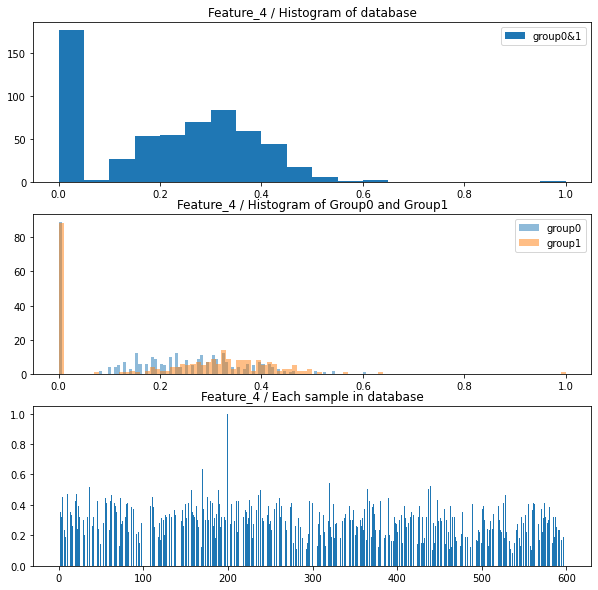

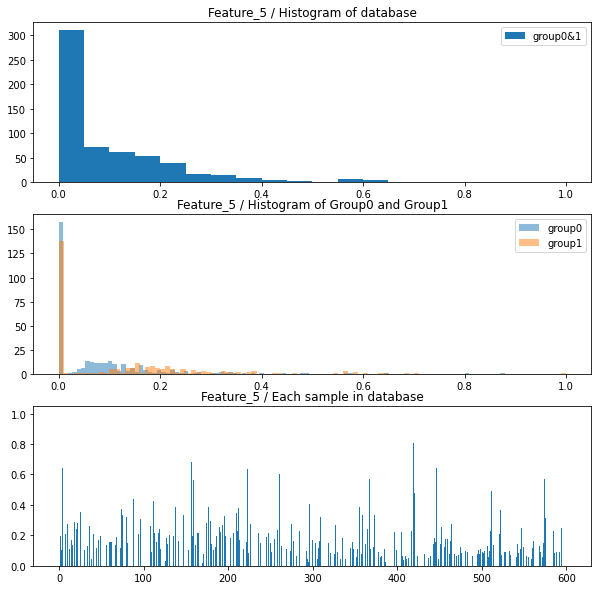

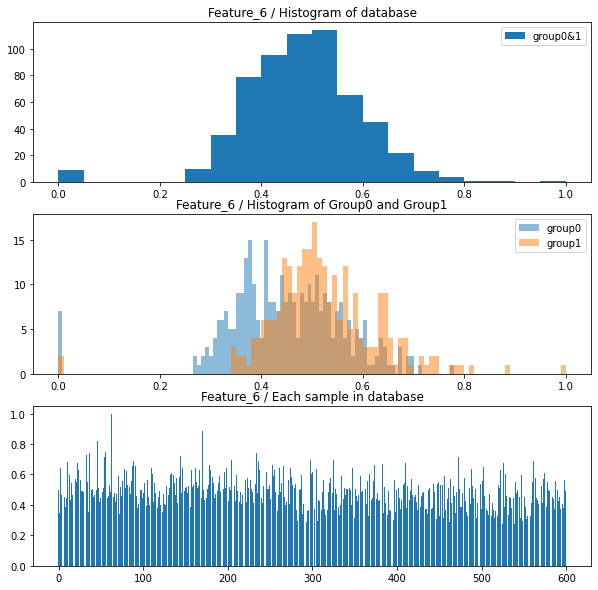

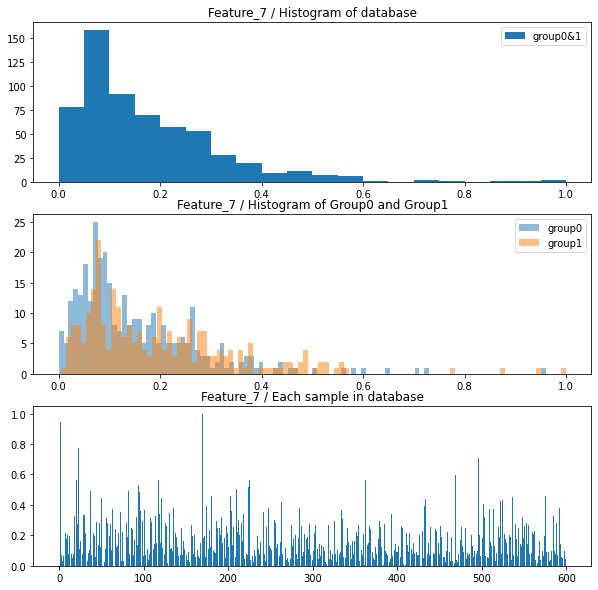

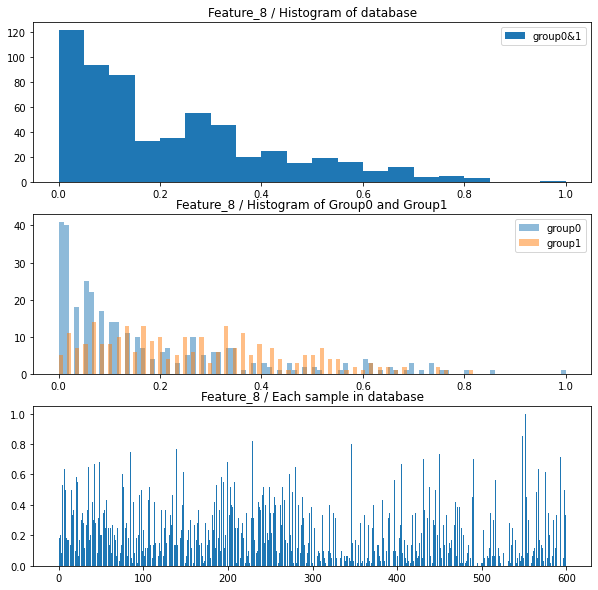

In [24]:
data_set = {'path': dataset_path, 
           'file': 'red_wine.csv',
           }

analysis = Statistical_Analysis()
analysis.init(data_set)

print('Histogram of database: {}'.format(analysis.file))
analysis.fig_histogram()

data_set['file'] = 'diabetes.csv'
analysis.init(data_set)
print('Histogram of database: {}'.format(analysis.file))
analysis.fig_histogram()

Run this cell for compare thresshold task and compare learning rate

C:\Users\VanBinh\Documents\Mcgill\Group18_project1\training_model\discriminative_learning.py:77: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


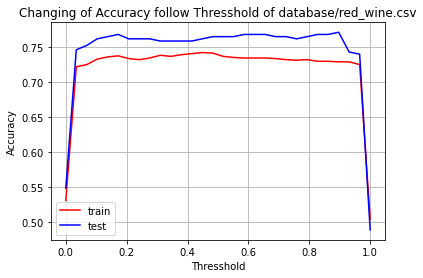

C:\Users\VanBinh\Documents\Mcgill\Group18_project1\training_model\discriminative_learning.py:77: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


---Training time of database type1  is 0.03232598304748535 seconds ---
---Training time of database type2  is 0.05002284049987793 seconds ---
Accuracy of data = red_wine.csv with learning rate type 1/(k+1):
	 training accuracy = [0.740625], validing  accuracy = [0.7648902821316614]
Accuracy of data = red_wine.csv with learning rate type 1/(2**t):
	 training accuracy = [0.71640625], validing  accuracy = [0.7147335423197492]


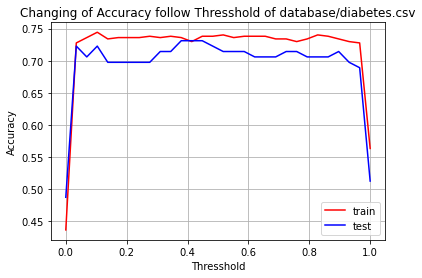

---Training time of database type1  is 0.008558034896850586 seconds ---
---Training time of database type2  is 0.021546602249145508 seconds ---
Accuracy of data = diabetes.csv with learning rate type 1/(k+1):
	 training accuracy = [0.7401247401247402], validing  accuracy = [0.7226890756302521]
Accuracy of data = diabetes.csv with learning rate type 1/(2**t):
	 training accuracy = [0.7422037422037422], validing  accuracy = [0.680672268907563]


In [ ]:
DL_info = {'path': 'database', 
           'file': 'red_wine.csv',
           'epsilon': 0.05,
           'learning_type': 'type1',
           'alpha': 0.2,
           'thresshold': 0.5,
           'rate': 0.8
           }

DL = Discriminative_Learning()
DL.init(DL_info)

# changing Accuracy follow different Thresshold 
DL.comp_thresshold()



# changing of Accucracy follow differnt learning rate
DL.init(DL_info)
acc_train_model, acc_valid_model = DL.comp_learning_rate()
print('Accuracy of data = {} with learning rate type 1/(k+1):'.format(DL.file))
print('\t training accuracy = {}, validing  accuracy = {}'.format(acc_train_model['type1'], acc_valid_model['type1']))

print('Accuracy of data = {} with learning rate type 1/(2**t):'.format(DL.file))
print('\t training accuracy = {}, validing  accuracy = {}'.format(acc_train_model['type2'], acc_valid_model['type2']))


DL_info['file'] = 'diabetes.csv'
DL.init(DL_info)
DL.comp_thresshold()

# changing of Accucracy follow differnt learning rate
DL.init(DL_info)
acc_train_model, acc_valid_model = DL.comp_learning_rate()
print('Accuracy of data = {} with learning rate type 1/(k+1):'.format(DL.file))
print('\t training accuracy = {}, validing  accuracy = {}'.format(acc_train_model['type1'], acc_valid_model['type1']))

print('Accuracy of data = {} with learning rate type 1/(2**t):'.format(DL.file))
print('\t training accuracy = {}, validing  accuracy = {}'.format(acc_train_model['type2'], acc_valid_model['type2']))


 Kfold task

In [ ]:
kfold_info = {'kflod': 10, 
              'path': 'database',
              'file': 'red_wine.csv'}

DL_info =    {'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
          }


DL_model = Discriminative_Learning
model = kfold_cross_validation(DL_model)
model.kflod_init(kfold_info, DL_info)

DL_train_acc, DL_valid_acc = model.kflod_validation()
print('Database is {}'.format(model.file))
print(' -Discriminative learning training model')
print('    The accuracy of training for {} database = '.format(kfold_info['path']) + str(DL_train_acc))
print('    The accuracy of test for {} database = '.format(kfold_info['path']) + str(DL_valid_acc))


LDA_info = {  'thresshold': 0.0,
              'rate': 0.8
          }
LDA_model = LDA_Learning

model = kfold_cross_validation(LDA_model)
model.kflod_init(kfold_info, LDA_info)
LDA_train_acc, LDA_valid_acc = model.kflod_validation()
print(' -LDA training model')
print('    The accuracy of training for {} database = '.format(kfold_info['path']) + str(LDA_train_acc))
print('    The accuracy of test for {} database = '.format(kfold_info['path']) + str(LDA_valid_acc))

#========================================================================================================

kfold_info = {'kflod': 10, 
              'path': 'database',
              'file': 'diabetes.csv'}

DL_info =    {'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
          }


DL_model = Discriminative_Learning
model = kfold_cross_validation(DL_model)
model.kflod_init(kfold_info, DL_info)

DL_train_acc, DL_valid_acc = model.kflod_validation()
print('Database is {}'.format(model.file))
print(' -Discriminative learning training model')
print('    The accuracy of training for {} database = '.format(kfold_info['path']) + str(DL_train_acc))
print('    The accuracy of test for {} database = '.format(kfold_info['path']) + str(DL_valid_acc))


LDA_info = {  'thresshold': 0.0,
              'rate': 0.8
          }
LDA_model = LDA_Learning

model = kfold_cross_validation(LDA_model)
model.kflod_init(kfold_info, LDA_info)
LDA_train_acc, LDA_valid_acc = model.kflod_validation()
print(' -LDA training model')
print('    The accuracy of training for {} database = '.format(kfold_info['path']) + str(LDA_train_acc))
print('    The accuracy of test for {} database = '.format(kfold_info['path']) + str(LDA_valid_acc))





C:\Users\VanBinh\Documents\Mcgill\Group18_project1\training_model\discriminative_learning.py:77: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Database is red_wine.csv
 -Discriminative learning training model
    The accuracy of training for database database = 0.7513687980433263
    The accuracy of test for database database = 0.7440139263252471
 -LDA training model
    The accuracy of training for database database = 0.7460905835080365
    The accuracy of test for database database = 0.7453728661275831
Database is diabetes.csv
 -Discriminative learning training model
    The accuracy of training for database database = 0.7385185185185186
    The accuracy of test for database database = 0.7233333333333334
 -LDA training model
    The accuracy of training for database database = 0.7418518518518518
    The accuracy of test for database database = 0.7316666666666667


    # new stop criteria, add feature, remove feature

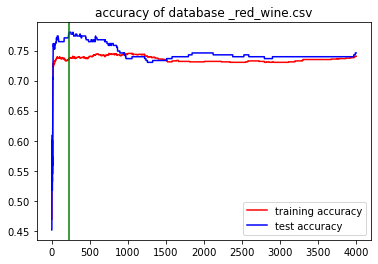

The accuracy new fit() of training for red_wine.csv database = 0.7359375
The accuracy new fit of Testing for red_wine.csv database = 0.7774294670846394
the best feature is at position:  10
[0.5323899371069182, 0.6451819407008086, 0.5759097035040431, 0.5314914645103325, 0.5631963162623539, 0.547214734950584, 0.594710242587601, 0.5464510332434861, 0.5271900269541778, 0.6468441150044923, 0.7034703504043126]
feature at position = [11, 1, 2, 3, 5, 7, 8, 9, 10] are remained
training accuracy those database = 0.750882250174703
testing accuracy those database = 0.7471922731356694
feature xi*xj at position [[-1, 0], [0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [6, 7]] should be added
acc_train_vec [0.7494924877707897, 0.7501878057302586, 0.7514382424877707, 0.751575821104123, 0.7521313766596787, 0.7502550663871418, 0.7514364954577218]
acc_test_vec [0.7478548966756514, 0.7471922731356694, 0.7452717879604672, 0.7471922731356694, 0.7490453728661276, 0.7503032345013477, 0.7478548966756514]


In [ ]:
   
# try new stop criteria
kfold_info = {'kflod': 10, 
              'path': 'database',
              'file': 'red_wine.csv'}

DL_info =    {'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
          }


DL_model = Discriminative_Learning
model = kfold_cross_validation


DL = DL_advance(model, DL_model)
DL.DL_init(kfold_info, DL_info)
   
W,Acc_train_vec, Acc_test_vec = DL.fit_adv()

print('The accuracy new fit() of training for {} database = '.format(DL.kfold.model.file) + str(Acc_train_vec))
print('The accuracy new fit of Testing for {} database = '.format(DL.kfold.model.file) + str(Acc_test_vec))


# this code is to remove unnecessary feature

   
acc_train_prev, acc_test_prev, idx_feature = DL.remove_feature()

print('feature at position = {} are remained'.format(idx_feature))
print('training accuracy those database = {}'.format(acc_train_prev))
print('testing accuracy those database = {}'.format(acc_test_prev))

# this code is to check for adding new feature from xi*xj, xi**2

acc_train_vec, acc_test_vec, idx_feature = DL.add_feature()
print('feature xi*xj at position {} should be added'.format(idx_feature))
print('acc_train_vec', acc_train_vec)
print('acc_test_vec', acc_test_vec)
